# Reversing dynamo

Use reconstructed stochastic data

In [1]:
from UnderdampedLangevinInference import underdampedlangevininference as uli
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
!ls data/

DipoleSourceC2.dat      DipoleSource_PADM2M.dat
DipoleSourceHF1.dat     t_X_eta.mat


In [3]:
filename = 'data/t_X_eta.mat'

In [4]:
def get_dipole_data(filename, variablename):
    mat = scipy.io.loadmat(filename)
    arrays = mat.get(variablename)
    t = np.array(arrays[0,:])
    x = np.array(arrays[1,:])
    x = x - np.mean(x)
    dt = (t[1] - [0])[0]
    dxdt = np.diff(x) / dt
    I = np.cumsum(x) * dt
    t = t[:-1]
    x = x[:-1]
    I = I[:-1]
    return t, x, dxdt, I

t_dipole, x_dipole, dxdt_dipole, I_dipole = get_dipole_data(filename, 't_X_eta')

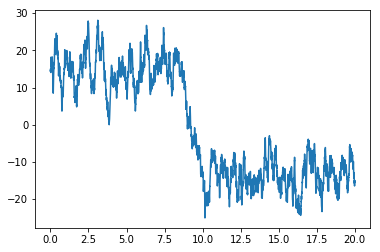

In [5]:
plt.plot(t_dipole[0:10000],x_dipole[0:10000])